<b>Project Description</b><br>
<br>
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.

<b>Dataset Description</b><br>
<br>
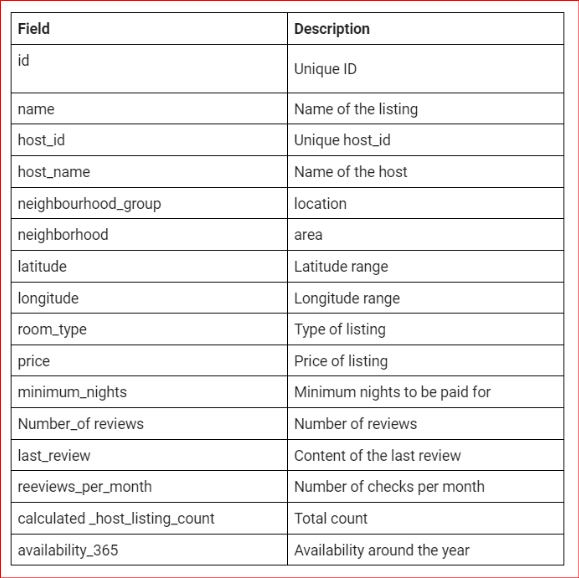

<b>What is AirBnb?</b><br>
<br>
Airbnb is an online marketplace that connects people who want to rent out their homes with people who are looking for accommodations in specific locales and hospitality service for people to lease or rent short-term lodging including holiday cottages, apartments, homestays, hostel beds, or hotel rooms. Basically they provide the platform that is shared by hosts and visitors worldwide.

<b>AirBNB Exploratory Data Analysis:

In [3]:
#importing every package required for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 

Importing CSV file from the local server to jupyter notebook using Pandas

In [4]:
airbnb = pd.read_csv(r'C:\Users\karti\Downloads\Airbnb_NYC_2019.csv')
airbnb.shape

(48895, 16)

Using head function to see first n number of rows

In [5]:
airbnb.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355


In [6]:
airbnb.info() # this function shows number of columns, which columns has null values, its type and the memory used

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [15]:
airbnb.isna().sum() # this shows sum of  null values in each column

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

We will not do anything with the NaN values as they are strings and will not impact our analysis

Droping the duplicate rows:


In [16]:
airbnb.drop_duplicates(inplace = True)
airbnb.shape

(48895, 16)

In [18]:
price = airbnb['price'].unique()
price.sort()
price

array([    0,    10,    11,    12,    13,    15,    16,    18,    19,
          20,    21,    22,    23,    24,    25,    26,    27,    28,
          29,    30,    31,    32,    33,    34,    35,    36,    37,
          38,    39,    40,    41,    42,    43,    44,    45,    46,
          47,    48,    49,    50,    51,    52,    53,    54,    55,
          56,    57,    58,    59,    60,    61,    62,    63,    64,
          65,    66,    67,    68,    69,    70,    71,    72,    73,
          74,    75,    76,    77,    78,    79,    80,    81,    82,
          83,    84,    85,    86,    87,    88,    89,    90,    91,
          92,    93,    94,    95,    96,    97,    98,    99,   100,
         101,   102,   103,   104,   105,   106,   107,   108,   109,
         110,   111,   112,   113,   114,   115,   116,   117,   118,
         119,   120,   121,   122,   123,   124,   125,   126,   127,
         128,   129,   130,   131,   132,   133,   134,   135,   136,
         137,   138,

In [20]:
airbnb['price'].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [19]:
airbnb[airbnb['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-01-06,0.05,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.56,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.71,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.53,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-01-02,0.15,1,73
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.28,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.37,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.35,6,222
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,NaN,NaN,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.11,6,333


In [22]:
# A function for price_correction

# changing price value from "0" to mean value of the price
# by taking mean it will npt affect the analysis

def price_correction(x):
    if x==0:
        return 152.72
    else:
        return x

Total number of listing in each area are:

In [48]:
n = airbnb['neighbourhood_group'].value_counts()
print(n)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


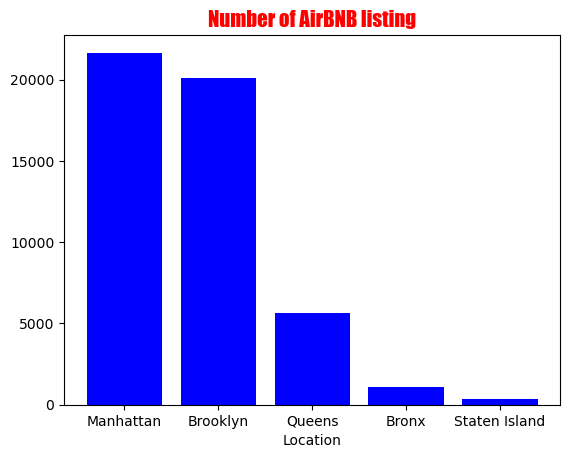

In [51]:
plt.bar(x= n.index, height=n.values, color = 'blue') #using matplotlib package for viz, using bar chart

font1 = {'family':'fantasy','color':'red','size':15} # this will create a dont stlye which can be used later

plt.title("Number of AirBNB listing", fontdict= font1) #adding title to the chart
plt.xlabel("Location") # adding labels to the x axis

plt.show() #this will show us the result


<Axes: xlabel='latitude', ylabel='longitude'>

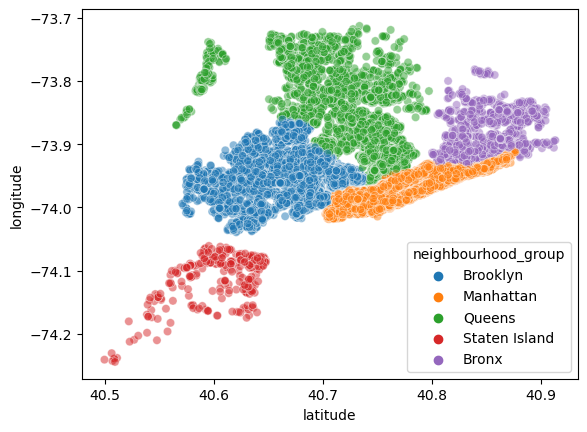

In [23]:
sns.scatterplot(data = airbnb, x = 'latitude',y = 'longitude', hue = 'neighbourhood_group',alpha = 0.5)

<b>Analysis:</b><br>
<br>
This shows Manhattan has more airbnb listing in the state of new york, USA <br>
But this doesn't necessarily means Manhattan has more number of bookings in the state

For the above problem we can estimate that if avereage availabiblty in one area is less than other area then we can say that area is more occqupied

In [42]:
airbnb[['neighbourhood_group','availability_365']]

#Sum of total number of availabilty for each location:
a = airbnb.groupby('neighbourhood_group')['availability_365'].sum()  

#Total number of days available for each location:
b = airbnb.groupby('neighbourhood_group')['availability_365'].count()

#Average number of days of availability in each location:
c = a/b
print(c)

neighbourhood_group
Bronx            165.758937
Brooklyn         100.232292
Manhattan        111.979410
Queens           144.451818
Staten Island    199.678284
Name: availability_365, dtype: float64


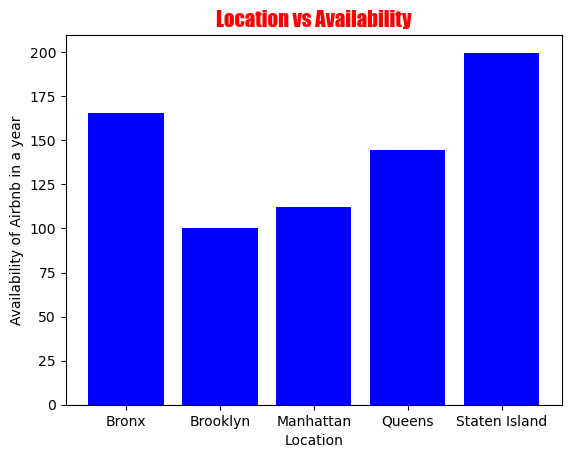

In [50]:
ava = plt.bar(x = c.index, height= c.values, color = 'blue')

plt.title("Location vs Availability", fontdict= font1)
plt.xlabel("Location")
plt.ylabel("Availability of Airbnb in a year")

plt.show()

<b>Analysis:</b><br>
<br>Here we can say that Brookyln & Manhattan has less availablity in the state of new york and has more properties as compared to others thus we can say Brooklyn is likely preferable followed by Manhattan 

------------------------------------------------------------------------------

In [26]:
count = airbnb.groupby('room_type')['room_type'].count() # finding the number of types of airbnb in each location

#finding the percentage of each type of rooms: 
perc_shared_room = (count["Shared room"]/count.sum())*100 
perc_Entire_roomapt = (count["Entire home/apt"]/count.sum())*100
perc_private_room = (count["Private room"]/count.sum())*100

pert = np.array([perc_shared_room,perc_Entire_roomapt, perc_private_room]) #creating a array for viz

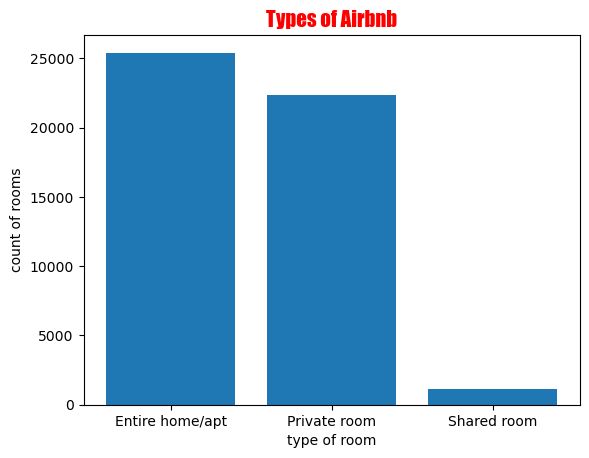

In [49]:
plt.bar(x=count.index, height=count.values)
plt.title("Types of Airbnb", fontdict= font1)
plt.xlabel("type of room")
plt.ylabel("count of rooms")
plt.show()

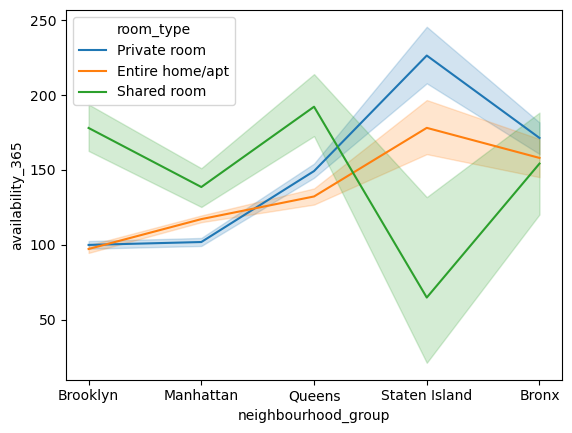

In [44]:
mylabels = ["shared room", "Entire room", "Private room"]
fig = px.pie(values= pert, names= mylabels) # here we have used plotly package which is interactive in nature
sns.lineplot(data=airbnb, x='neighbourhood_group', y='availability_365', hue='room_type')
fig.show()

<b>Analysis:</b><br>
<br>
From the above two graphs, Staten Island has most busiest Shared Room as well as Most available Private Room. Brroklyn and Manhattan has quite similar availabilities. On the other hand, from Price vs Availability graph, we can notice almost uniform distribution i.e. A particular room type of a particular price range can be available throughout year.

Here we can say there are 52% of total airbnb listing that are entire room airbnb

In [46]:
sum_price = airbnb.groupby('neighbourhood_group')['price'].sum() # Adding price grouping it by location
count_price =  airbnb.groupby('neighbourhood_group')['price'].count() # total airbnb grouped by location

#finding the average price in each location:
average_price = sum_price / count_price
print(average_price)

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


In [60]:
#this is the another way fro finding mean, we have grouped the mean price with respect to location and room type
mean_price = airbnb.groupby(['neighbourhood_group', 'room_type'], as_index=False)[['price']].mean()

In [45]:
np.average(airbnb['price']) #average price in the state if new york

152.7206871868289

Text(0.5, 1.0, 'avereage price for each room type in each locations')

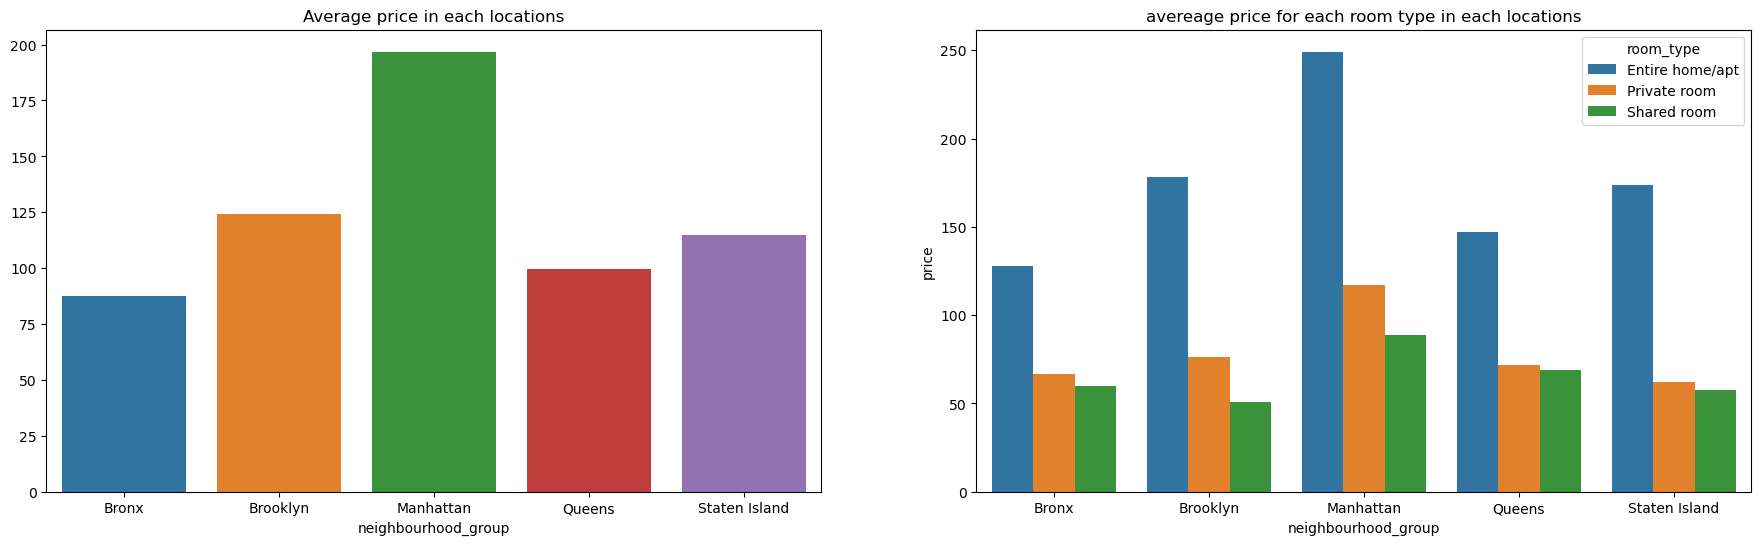

In [70]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(22, 6))
ax = axes.flatten()

sns.barplot(x = average_price.index, y= average_price.values, ax=ax[0])
ax[0].set_title("Average price in each locations")

sns.barplot(data=mean_price, x='neighbourhood_group', y ='price', hue='room_type', ax=ax[1])
ax[1].set_title("avereage price for each room type in each locations")

<b>Analysis:</b><br>
<br>
If a customer wants to stay at good location where there are more housing listed with less price comparitively then that customer should stay at Brroklyn. <br>
Brooklyn has more properties listed as well as demand in that area is also high and the proce of the Air Bnb is less comapred to Manhattan nut more compared to rest of the areas in New york<br>
If one wants less priced AirBnb then, one should consider Bronx, where there are limited listings but is avaivlable more compared to others

Lets find the best reviewed property in Newyork:


In [56]:
sort = airbnb.sort_values(by='number_of_reviews', ascending=False)
review = sort[['name','neighbourhood_group', 'number_of_reviews', 'price']]
r1 = review.head(10)
r1

,name,neighbourhood_group,number_of_reviews,price
11759,Room near JFK Queen Bed,Queens,629,47
2031,Great Bedroom in Manhattan,Manhattan,607,49
2030,Beautiful Bedroom in Manhattan,Manhattan,597,49
2015,Private Bedroom in Manhattan,Manhattan,594,49
13495,Room Near JFK Twin Beds,Queens,576,47
10623,Steps away from Laguardia airport,Queens,543,46
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,Manhattan,540,99
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,Queens,510,48
4870,Private brownstone studio Brooklyn,Brooklyn,488,160
471,LG Private Room/Family Friendly,Brooklyn,480,60


<b>Analysis:</b><br>
<br>
<b>Room near JFK Queen Bed</b> is one with highest reviewed Airbnb listing in the whole New york City, it doesn't mean it is the best rated airbnb but we can sure tell this is most prefered airbnb out there<br>
It has less price and then the average that is <b>$49</b>, this can be best for budget travellers  

<b>Conclusion</b><br>

<ul>
</ul>
<li>Manhattan and Brooklyn are the two distinguished, expensive & posh areas of NY <br></li>
<li>Though location of property has high relation on deciding its price, but a property in popular location doesn't mean it will stay occupied in most of the time.<br></li>
<li>Most visitors don't prefer shared rooms, they tend to visit private room or entire home.<br></li>
<li>If one wants less priced AirBnb then, one should consider Bronx, where there are limited listings but is avaivlable more compared to others <br></li>
<li><b>Room near JFK Queen Bed</b> is one with highest reviewed Airbnb listing in the whole New york City, it doesn't mean it is the best rated airbnb but we can sure tell this is most prefered airbnb out there<br></li>
<li>It has less price and then the average that is <b>$49</b>, this can be best for budget travellers</li>
